Part 1

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
logins = pd.read_json('logins.json')

In [4]:
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [10]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [8]:
print("Missing values:")
print(logins.isnull().sum())

print("\nDuplicate entries:", logins.duplicated().sum())

print("\nData types:")
print(logins.dtypes)

print("\nTimestamp range:")
print(logins['login_time'].min(), "to", logins['login_time'].max())

Missing values:
login_time    0
dtype: int64

Duplicate entries: 877

Data types:
login_time    datetime64[ns]
dtype: object

Timestamp range:
1970-01-01 20:12:16 to 1970-04-13 18:57:38


In [17]:
logins['login_time'] = pd.to_datetime(logins['login_time'])

logins_15min = logins.set_index('login_time').resample('15T').size().reset_index(name='count')

In [18]:
logins_15min

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


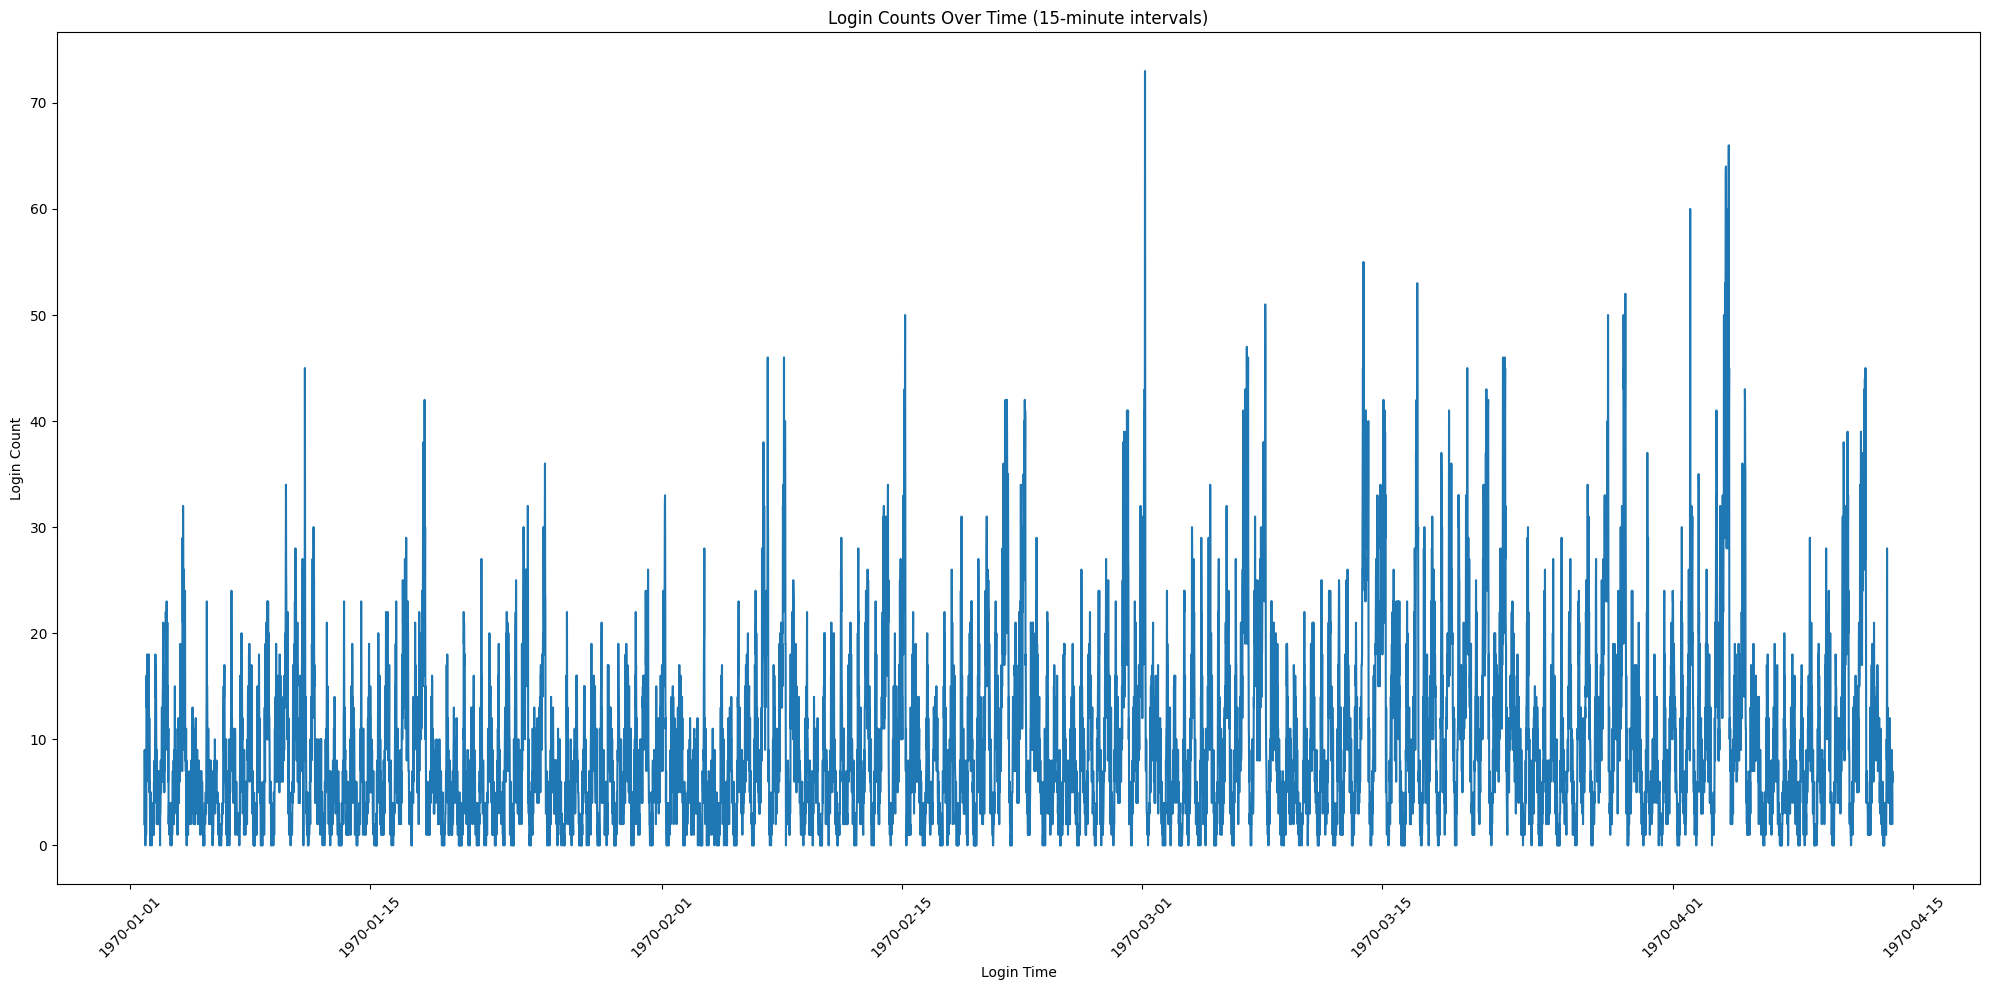

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(logins_15min['login_time'], logins_15min['count'])
plt.title('Login Counts Over Time (15-minute intervals)')
plt.xlabel('Login Time')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

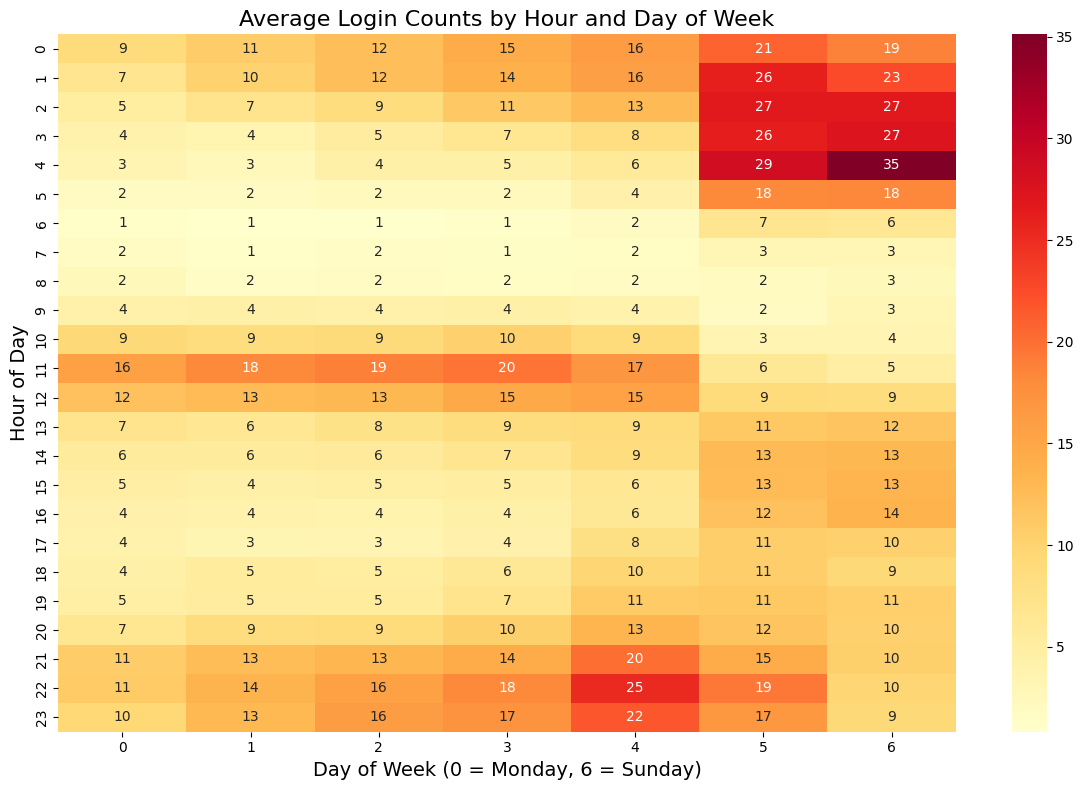

In [23]:
logins_15min['hour'] = logins_15min['login_time'].dt.hour
logins_15min['day_of_week'] = logins_15min['login_time'].dt.dayofweek

pivot_table = logins_15min.pivot_table(values='count', index='hour', columns='day_of_week', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Login Counts by Hour and Day of Week', fontsize=16)
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)', fontsize=14)
plt.ylabel('Hour of Day', fontsize=14)
plt.tight_layout()
plt.show()

In [24]:
daily_stats = logins_15min.groupby(logins_15min['login_time'].dt.date)['count'].agg(['mean', 'min', 'max'])
hourly_stats = logins_15min.groupby('hour')['count'].mean().sort_values(ascending=False)

print("Daily Statistics:")
print(daily_stats.describe())

print("\nTop 5 Busiest Hours:")
print(hourly_stats.head())

print("\nBottom 5 Least Busy Hours:")
print(hourly_stats.tail())

Daily Statistics:
             mean         min         max
count  103.000000  103.000000  103.000000
mean     9.486847    0.087379   32.203883
std      3.515930    0.316438   11.565126
min      4.781250    0.000000   16.000000
25%      6.729167    0.000000   23.000000
50%      8.614583    0.000000   29.000000
75%     11.885417    0.000000   41.000000
max     19.677083    2.000000   73.000000

Top 5 Busiest Hours:
hour
22    16.193627
1     15.482843
23    14.848039
0     14.688725
2     14.215686
Name: count, dtype: float64

Bottom 5 Least Busy Hours:
hour
17    6.333333
9     3.742647
6     2.789216
8     2.004902
7     1.997549
Name: count, dtype: float64


On average, there are about 9.49 logins per 15-minute interval each day.
The busiest 15-minute interval on any day saw up to 73 logins.
There are periods with no logins (min of 0), suggesting very low activity times.
There's significant variation in daily login activity, with a standard deviation of 3.52.

The peak login activity occurs late at night and in the early morning hours.
The busiest hour is 10 PM (22:00), followed by 1 AM, 11 PM, 12 AM, and 2 AM.
This pattern suggests a user base that is most active during night hours, which is unusual for typical business hours.

The least active hours are in the morning and early afternoon.
The quietest hour is 7 AM, followed by 8 AM, 6 AM, 9 AM, and 5 PM.
This further reinforces the notion of a user base that is not aligned with traditional 9-to-5 working hours.

There's a clear inverse relationship between typical working hours and login activity.
The pattern suggests users are most active late at night and least active in the morning.
Potential Explanations:
The user base might be in a different time zone from where the server is located.
The service could be catering to night owls, gamers, or shift workers.
It's possible that this is a global service with users predominantly from regions in a different time zone.

Schedule maintenance and updates during the least busy hours (around 7-9 AM).
Ensure robust system performance and support during peak hours (10 PM - 2 AM).
Consider time zone differences when interpreting these results and planning user engagement strategies.
If this is unexpected behavior, investigate if there are any anomalies or if the timestamp data is correctly recorded.

Analyze weekly patterns to see if weekends differ from weekdays.
Investigate if there are any seasonal trends or special events causing these patterns.

If possible, segment users by geography to understand if different regions contribute to different parts of the daily cycle.

The presence of intervals with zero logins suggests there might be complete dropouts or very low usage periods. This should be investigated to ensure it's not due to data collection issues.

The wide range between minimum and maximum daily logins indicates high variability, which could be normal but might also suggest some anomalous days that warrant closer examination.

Part 2

1. We want drivers to be active in both cities. Currently, drivers tend to stick to one city. By reimbursing toll costs, we want to encourage drivers to be available in both cities. Therefore, the most straightforward way to measure success of this initiative is the total reimbursemnt payed out - a higher number here indicates more activty from both cities to another.

2. Practical Experiment Design:

a) Implementation:
Duration: 3 months
Control group: Randomly select 50% of drivers to receive toll reimbursements
Treatment group: The other 50% continue without reimbursements
Collect data on:
i. Number of trips in each city per driver
ii. Time of day for each trip
iii. Total reimbursements (for treatment group)

b) Statistical Tests:
Chi-square test of independence to compare the proportion of cross-city drivers in treatment vs control groups
Two-sample t-test to compare the mean number of cross-city trips between groups
Time series analysis to examine changes in cross-city activity over time

c) Interpretation and Recommendations:

If the treatment group shows a significantly higher cross-city activity rate, recommend full implementation of the reimbursement policy.
Analyze cost-effectiveness by comparing increased revenue from cross-city trips to reimbursement costs.
Examine time-of-day patterns to ensure the policy is addressing the complementary circadian rhythms.
Caveats:
Consider seasonal effects that might influence travel patterns
Monitor for potential gaming of the system (e.g., unnecessary trips just to claim reimbursement)
Assess impact on traffic congestion and adjust if necessary.

Part 3

In [25]:
ultimate = pd.read_json('ultimate_data_challenge.json')

In [26]:
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [27]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [34]:
ultimate['city'].value_counts()

,count
city,
Winterfell,23336
Astapor,16534
King's Landing,10130


In [28]:
print(ultimate.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


Missing values for avg_rating_of_driver, phone, and avg_rating_by_driver. We can impute these when we build our model's pipeline.

In [41]:
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'], format='%Y-%m-%d')
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'], format='%Y-%m-%d')

#We have 2 forms of retention: short_term (30 days after login) and long_term (6 months after login)

last_date = ultimate['last_trip_date'].max()
ultimate['short_term'] = (last_date - ultimate['last_trip_date']).dt.days <= 30
ultimate['long_term'] = (ultimate['last_trip_date'] - ultimate['signup_date']) >= timedelta(days=180)

# Calculate retention rates
short_term_rate = ultimate['short_term'].mean()
long_term_rate = ultimate['long_term'].mean()
print(f"Short term Retention rate: {short_term_rate:.2%}")
print(f"Long term Retention rate: {long_term_rate:.2%}")

Short term Retention rate: 37.61%
Long term Retention rate: 0.17%


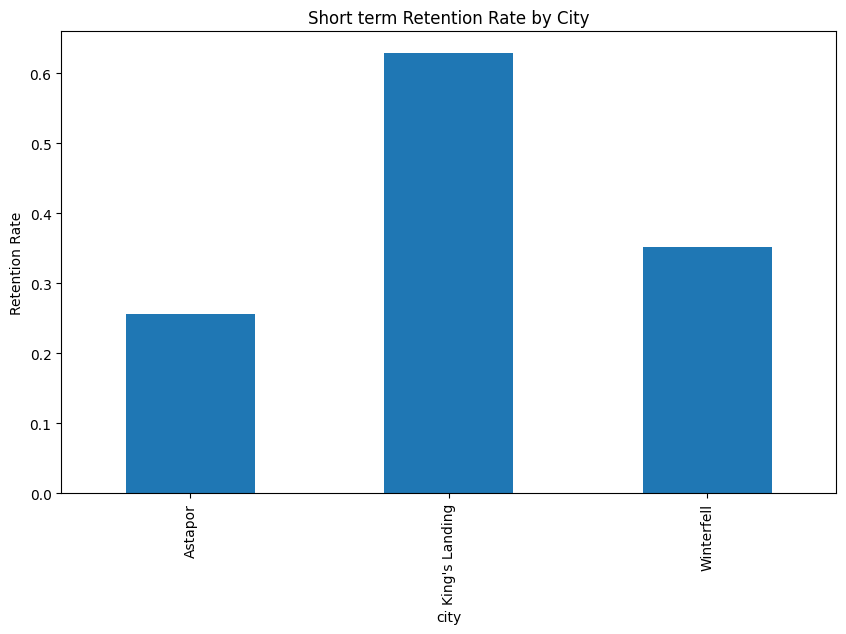

In [45]:
plt.figure(figsize=(10, 6))
ultimate.groupby('city')['short_term'].mean().plot(kind='bar')
plt.title('Short term Retention Rate by City')
plt.ylabel('Retention Rate')
plt.show()

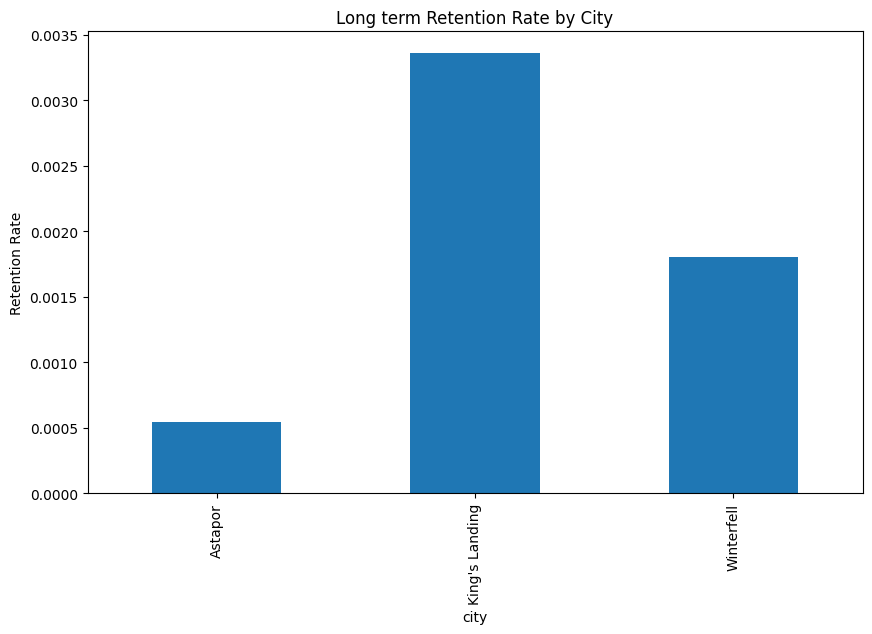

In [46]:
plt.figure(figsize=(10, 6))
ultimate.groupby('city')['long_term'].mean().plot(kind='bar')
plt.title('Long term Retention Rate by City')
plt.ylabel('Retention Rate')
plt.show()

Total of 37% short term retention and a much lower 0.17% long term retention across 3 cities. King's landing the highest for both.

In [47]:
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,short_term,long_term
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True,True,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,False,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,False,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True,True,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,True,True,False
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,False,False,False
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,False,False,False
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,False,False,False


We know there is a high class imbalance, where the majority of users are not retained by 6 months. I'll use a random forest model for the adaptability to a wide range of situations and relationships.  

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct',
            'avg_surge', 'trips_in_first_30_days', 'weekday_pct']
X = ultimate[features]
y = ultimate['long_term']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
rf_model = pipeline.named_steps['rf']

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [55]:
accuracy

0.9987

In [59]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
                  feature  importance
0                avg_dist    0.330987
6             weekday_pct    0.185064
3               surge_pct    0.141983
2    avg_rating_of_driver    0.092864
5  trips_in_first_30_days    0.087063
4               avg_surge    0.085745
1    avg_rating_by_driver    0.076295


We see avg_dist to be the strongest feature in the set by a considerable amount.

In [60]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[9987    0]
 [  13    0]]


We see the model predicted 0 TP cases, but had 13 FN. This points to the class imbalance problem - our 6 month retention is so low, it's hard to build a decent model based on available data. I would recommend focusing on shorter term retention, where there is a greater class balance, providing the model more to work with.